In [1]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

aby se v tom prase vyznalo

In [ ]:
Questions that occur to me:
	a) Has anyone from UKESM calculated the overturning recently?
	b) Are there any other meshmasks around to try, in case I did the reverse-engineering wrong?

Any other thoughts are extremely welcome, and I apologize for being so stumped. 

I have all the relevant data (temp, sal, v-velocity) downloaded from the tapes for UKESM, so once (if) I solve this issue, the actual computations shouldn’t take too long for all the scenarios. Other aspects of the project(s) are proceeding more smoothly, and I am working on a draft of the winds results for co-authors. 


Cheers,
Tereza


In [2]:
mtom = xr.open_dataset('/gpfs/home/mep22dku/cdftools/mesh_mask3_6.nc')
mukesm = xr.open_dataset('/gpfs/home/mep22dku/cdftools/mesh_mask_eORCA1_wrk.nc')
mukesm.keys()

KeysView(<xarray.Dataset>
Dimensions:       (x: 362, y: 332, z: 75)
Dimensions without coordinates: x, y, z
Data variables:
    e1f           (y, x) float64 ...
    e1t           (y, x) float64 ...
    e1u           (y, x) float64 ...
    e1v           (y, x) float64 ...
    e2f           (y, x) float64 ...
    e2t           (y, x) float64 ...
    e2u           (y, x) float64 ...
    e2v           (y, x) float64 ...
    ff            (y, x) float64 ...
    fmask         (z, y, x) int8 ...
    fmaskutil     (y, x) int8 ...
    gdepu         (z, y, x) float32 ...
    gdepv         (z, y, x) float32 ...
    glamf         (y, x) float32 ...
    glamt         (y, x) float32 ...
    glamu         (y, x) float32 ...
    glamv         (y, x) float32 ...
    gphif         (y, x) float32 ...
    gphit         (y, x) float32 ...
    gphiu         (y, x) float32 ...
    gphiv         (y, x) float32 ...
    isfdraft      (y, x) float32 ...
    mbathy        (y, x) int16 ...
    misf          (y, x)

In [3]:
tvar = 'nav_lev'
print(mukesm[tvar])
print(mtom[tvar])

<xarray.DataArray 'nav_lev' (z: 75)>
array([5.057600e-01, 1.555855e+00, 2.667682e+00, 3.856280e+00, 5.140361e+00,
       6.543034e+00, 8.092519e+00, 9.822750e+00, 1.177368e+01, 1.399104e+01,
       1.652532e+01, 1.942980e+01, 2.275762e+01, 2.655830e+01, 3.087456e+01,
       3.574020e+01, 4.118002e+01, 4.721189e+01, 5.385064e+01, 6.111284e+01,
       6.902168e+01, 7.761116e+01, 8.692943e+01, 9.704131e+01, 1.080303e+02,
       1.200000e+02, 1.330758e+02, 1.474062e+02, 1.631645e+02, 1.805499e+02,
       1.997900e+02, 2.211412e+02, 2.448906e+02, 2.713564e+02, 3.008875e+02,
       3.338628e+02, 3.706885e+02, 4.117939e+02, 4.576256e+02, 5.086399e+02,
       5.652923e+02, 6.280260e+02, 6.972587e+02, 7.733683e+02, 8.566790e+02,
       9.474479e+02, 1.045854e+03, 1.151991e+03, 1.265861e+03, 1.387377e+03,
       1.516364e+03, 1.652568e+03, 1.795671e+03, 1.945296e+03, 2.101027e+03,
       2.262422e+03, 2.429025e+03, 2.600380e+03, 2.776039e+03, 2.955570e+03,
       3.138565e+03, 3.324641e+03, 3.51

In [4]:
#mtom.tmask
mukesm
# mtom.ff

<xarray.Dataset>
Dimensions:       (x: 362, y: 332, z: 75)
Dimensions without coordinates: x, y, z
Data variables:
    e1f           (y, x) float64 ...
    e1t           (y, x) float64 ...
    e1u           (y, x) float64 ...
    e1v           (y, x) float64 ...
    e2f           (y, x) float64 ...
    e2t           (y, x) float64 ...
    e2u           (y, x) float64 ...
    e2v           (y, x) float64 ...
    ff            (y, x) float64 ...
    fmask         (z, y, x) int8 ...
    fmaskutil     (y, x) int8 ...
    gdepu         (z, y, x) float32 ...
    gdepv         (z, y, x) float32 ...
    glamf         (y, x) float32 ...
    glamt         (y, x) float32 ...
    glamu         (y, x) float32 ...
    glamv         (y, x) float32 ...
    gphif         (y, x) float32 ...
    gphit         (y, x) float32 ...
    gphiu         (y, x) float32 ...
    gphiv         (y, x) float32 ...
    isfdraft      (y, x) float32 ...
    mbathy        (y, x) int16 ...
    misf          (y, x) int16 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
    nav_lon       (y, x) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    tmaskutil     (y, x) int8 ...
    umask         (z, y, x) int8 ...
    umaskutil     (y, x) int8 ...
    vmask         (z, y, x) int8 ...
    vmaskutil     (y, x) int8 ...
    e3t           (z, y, x) float64 ...
    e3u           (z, y, x) float64 ...
    e3v           (z, y, x) float64 ...
    e3w           (z, y, x) float64 ...
    e3t_0         (z) float64 ...
    e3w_0         (z) float64 ...
    gdept,        (z, y, x) float32 ...
    gdepw         (z, y, x) float32 ...
    gdept_0       (z) float64 ...
    gdepw_0       (z) float64 ...
Attributes:
    file_name:                 mesh_mask.nc
    TimeStamp:                 13/01/2016 14:10:41 +0000
    NCO:                       4.3.2
    nco_openmp_thread_number:  1
    history:                   Wed Jan 13 16:57:27 2016: /project/ukmo/rhel6/...

In [7]:
tmask = np.zeros([1,75,332,362], dtype = 'i8')
tmask[0,:,:,:] = (mukesm['tmask'].values)

In [13]:
nav_lat = mukesm['nav_lat'].values
nav_lat
# nav_lat.dtype = 'f32'

array([[-84.21071 , -84.21071 , -84.21071 , ..., -84.21071 , -84.21071 ,
        -84.21071 ],
       [-84.108955, -84.108955, -84.108955, ..., -84.108955, -84.108955,
        -84.108955],
       [-84.005424, -84.005424, -84.005424, ..., -84.005424, -84.005424,
        -84.005424],
       ...,
       [ 50.00502 ,  50.00502 ,  50.224403, ...,  50.224403,  50.00502 ,
         50.00502 ],
       [ 50.01094 ,  50.01094 ,  50.229362, ...,  50.229362,  50.01094 ,
         50.01094 ],
       [ 50.01094 ,  50.01094 ,  50.229362, ...,  50.229362,  50.01094 ,
         50.01094 ]], dtype=float32)

In [17]:
#what is new file going to be called:
i = 1
save = True
savenam = f'testUKESMmask{i}.nc'
print(savenam)

nav_lat = mukesm['nav_lat'].values
nav_lat.dtype = 'float32'

nav_lon = mukesm['nav_lon'].values
nav_lon.dtype = 'float32'

nav_lev = mukesm['nav_lev'].values
nav_lev.dtype = 'float32'

time_counter = mtom['time_counter'].values
time_counter.dtype = 'float64'

tmask = np.zeros([1,75,332,362], dtype = 'int8')
tmask[0,:,:,:] = mukesm['tmask'].values
umask = np.zeros([1,75,332,362], dtype = 'int8')
umask[0,:,:,:] = mukesm['umask'].values
vmask = np.zeros([1,75,332,362], dtype = 'int8')
vmask[0,:,:,:] = mukesm['vmask'].values
fmask = np.zeros([1,75,332,362], dtype = 'int8')
fmask[0,:,:,:] = mukesm['fmask'].values

tmaskutil = np.zeros([1,332,362], dtype = 'int8')
tmaskutil[0,:,:] = mukesm['tmaskutil'].values
umaskutil = np.zeros([1,332,362], dtype = 'int8')
umaskutil[0,:,:] = mukesm['umaskutil'].values
vmaskutil = np.zeros([1,332,362], dtype = 'int8')
vmaskutil[0,:,:] = mukesm['vmaskutil'].values
fmaskutil = np.zeros([1,332,362], dtype = 'int8')
fmaskutil[0,:,:] = mukesm['fmaskutil'].values

glamt = np.zeros([1,332,362], dtype = 'float32')
glamt[0,:,:] = mukesm['glamt'].values
glamu = np.zeros([1,332,362], dtype = 'float32')
glamu[0,:,:] = mukesm['glamu'].values
glamv = np.zeros([1,332,362], dtype = 'float32')
glamv[0,:,:] = mukesm['glamv'].values
glamf = np.zeros([1,332,362], dtype = 'float32')
glamf[0,:,:] = mukesm['glamf'].values

gphit = np.zeros([1,332,362], dtype = 'float32')
gphit[0,:,:] = mukesm['gphit'].values
gphiu = np.zeros([1,332,362], dtype = 'float32')
gphiu[0,:,:] = mukesm['gphiu'].values
gphiv = np.zeros([1,332,362], dtype = 'float32')
gphiv[0,:,:] = mukesm['gphiv'].values
gphif = np.zeros([1,332,362], dtype = 'float32')
gphif[0,:,:] = mukesm['gphif'].values

e1t = np.zeros([1,332,362], dtype = 'float64')
e1t[0,:,:] = mukesm['e1t'].values
e1u = np.zeros([1,332,362], dtype = 'float64')
e1u[0,:,:] = mukesm['e1u'].values
e1v = np.zeros([1,332,362], dtype = 'float64')
e1v[0,:,:] = mukesm['e1v'].values
e1f = np.zeros([1,332,362], dtype = 'float64')
e1f[0,:,:] = mukesm['e1f'].values

e2t = np.zeros([1,332,362], dtype = 'float64')
e2t[0,:,:] = mukesm['e2t'].values
e2u = np.zeros([1,332,362], dtype = 'float64')
e2u[0,:,:] = mukesm['e2u'].values
e2v = np.zeros([1,332,362], dtype = 'float64')
e2v[0,:,:] = mukesm['e2v'].values
e2f = np.zeros([1,332,362], dtype = 'float64')
e2f[0,:,:] = mukesm['e2f'].values

ff = np.zeros([1,332,362], dtype = 'float64')
ff[0,:,:] = mukesm['ff'].values


mbathy = np.zeros([1,332,362], dtype = 'int16')
mbathy[0,:,:] = mukesm['mbathy'].values
misf = np.zeros([1,332,362], dtype = 'int16')
misf[0,:,:] = mukesm['misf'].values
isfdraft = np.zeros([1,332,362], dtype = 'float32')
isfdraft[0,:,:] = mukesm['isfdraft'].values


#
e3t_0 = np.zeros([1,75,332,362], dtype = 'float64')
e3t_0[0,:,:,:] = mukesm['e3t'].values
e3u_0 = np.zeros([1,75,332,362], dtype = 'float64')
e3u_0[0,:,:,:] = mukesm['e3u'].values
e3v_0 = np.zeros([1,75,332,362], dtype = 'float64')
e3v_0[0,:,:,:] = mukesm['e3v'].values
e3w_0 = np.zeros([1,75,332,362], dtype = 'float64')
e3w_0[0,:,:,:] = mukesm['e3w'].values

gdept_0 = np.zeros([1,75,332,362], dtype = 'float32')
gdept_0[0,:,:,:] = mukesm['gdept,'].values


gdepu = np.zeros([1,75,332,362], dtype = 'float32')
gdepu[0,:,:,:] = mukesm['gdepu'].values
gdepv = np.zeros([1,75,332,362], dtype = 'float32')
gdepv[0,:,:,:] = mukesm['gdepv'].values
gdepw_0 = np.zeros([1,75,332,362], dtype = 'float32')
gdepw_0[0,:,:,:] = mukesm['gdepw'].values

gdept_1d = np.zeros([1,75], dtype = 'float64')
gdept_1d[0,:] = mukesm['gdepw_0'].values
gdepw_1d = np.zeros([1,75], dtype = 'float64')
gdepw_1d[0,:] = mukesm['gdepw_0'].values

e3t_1d = np.zeros([1,75], dtype = 'float64')
e3t_1d[0,:] = mukesm['e3t_0'].values
e3w_1d = np.zeros([1,75], dtype = 'float64')
e3w_1d[0,:] = mukesm['e3w_0'].values

data_vars = { 'nav_lat': (['y', 'x'], nav_lat),
             'nav_lon': (['y', 'x'], nav_lon),
             'nav_lev': (['z'], nav_lev),
             'time_counter': (['t'], time_counter),
             'tmask': (['t','z','y','x'], tmask),
             'umask': (['t','z','y','x'], umask),
             'vmask': (['t','z','y','x'], vmask),
             'fmask': (['t','z','y','x'], fmask),
             'tmaskutil': (['t','y','x'], tmaskutil),
             'umaskutil': (['t','y','x'], umaskutil),
             'vmaskutil': (['t','y','x'], vmaskutil),
             'fmaskutil': (['t','y','x'], fmaskutil),
             'glamt': (['t','y','x'], glamt),
             'glamv': (['t','y','x'], glamv),
             'glamf': (['t','y','x'], glamf),
             'glamu': (['t','y','x'], glamu),
             'gphit': (['t','y','x'], gphit),
             'gphiv': (['t','y','x'], gphiv),
             'gphif': (['t','y','x'], gphif),
             'gphiu': (['t','y','x'], gphiu),
             'e1t': (['t','y','x'], e1t),
             'e1v': (['t','y','x'], e1v),
             'e1f': (['t','y','x'], e1f),
             'e1u': (['t','y','x'], e1u),
             'e2t': (['t','y','x'], e2t),
             'e2v': (['t','y','x'], e2v),
             'e2f': (['t','y','x'], e2f),
             'e2u': (['t','y','x'], e2u),
             'ff': (['t','y','x'], ff),
             'mbathy': (['t','y','x'], mbathy),
             'misf': (['t','y','x'], misf),
             'isfdraft': (['t','y','x'], isfdraft),
             'e3t_0': (['t','z','y','x'], e3t_0),
             'e3v_0': (['t','z','y','x'], e3v_0),
             'e3w_0': (['t','z','y','x'], e3w_0),
             'e3u_0': (['t','z','y','x'], e3u_0),
             'gdept_0': (['t','z','y','x'], gdept_0),
             'gdepu': (['t','z','y','x'], gdepu),
             'gdepv': (['t','z','y','x'], gdepv),
             'gdepw_0': (['t','z','y','x'], gdepw_0),
             'gdept_1d': (['t','z'], gdept_1d),
             'gdepw_1d': (['t','z'], gdepw_1d),
             'e3t_1d': (['t','z'], e3t_1d),
             'e3w_1d': (['t','z'], e3w_1d),

            }

# # define coordinates
# coords = {'t': (['t'], np.array([0])),
#     'y': (['y'], np.arange(0,332,1) ),
#     'x': (['x'], np.arange(0,362,1) ),
#     'z': (['z'], np.arange(0,75,1) ),
          
          
         # }
#     'deptht': (['deptht'], deptht)}

# define global attributes
attrs = {'made in':'overturning/makeNewUKESMmask.ipynb',
        'desc': 'make a consistent ukesm1 meshmask'
        }

ds = xr.Dataset(data_vars=data_vars,
                attrs=attrs)

if save:
    try:
        ds.to_netcdf(savenam)
        print('look mum i made it')
    except:
        print(f'seems like {savenam} exists already')

testUKESMmask1.nc
look mum i made it


In [3]:
import xarray as xr
q = xr.open_dataset('testUKESMmask0.nc')
q

<xarray.Dataset>
Dimensions:       (t: 1, x: 362, y: 332, z: 75)
Coordinates:
  * t             (t) int64 0
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 324 325 326 327 328 329 330 331
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360 361
  * z             (z) int64 0 1 2 3 4 5 6 7 8 9 ... 66 67 68 69 70 71 72 73 74
Data variables:
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) float64 ...
    umask         (t, z, y, x) float64 ...
    vmask         (t, z, y, x) float64 ...
    fmask         (t, z, y, x) float64 ...
    tmaskutil     (t, y, x) float64 ...
    umaskutil     (t, y, x) float64 ...
    vmaskutil     (t, y, x) float64 ...
    fmaskutil     (t, y, x) float64 ...
    glamt         (t, y, x) float64 ...
    glamv         (t, y, x) float64 ...
    glamf         (t, y, x) float64 ...
    glamu         (t, y, x) float64 ...
    gphit         (t, y, x) float64 ...
    gphiv         (t, y, x) float64 ...
    gphif         (t, y, x) float64 ...
    gphiu         (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    ff            (t, y, x) float64 ...
    mbathy        (t, y, x) float64 ...
    misf          (t, y, x) float64 ...
    isfdraft      (t, y, x) float64 ...
    e3t_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    gdept_0       (t, z, y, x) float64 ...
    gdepu         (t, z, y, x) float64 ...
    gdepv         (t, z, y, x) float64 ...
    gdepw_0       (t, z, y, x) float64 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    made in:  overturning/makeNewUKESMmask.ipynb
    desc:     make a consistent ukesm1 meshmask

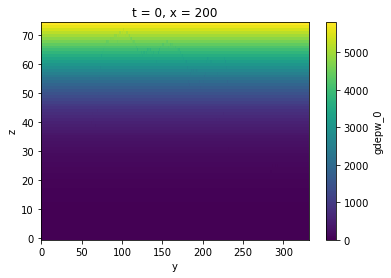

In [5]:


xr.plot.pcolormesh(q.gdepw_0.isel(t = 0).isel(x = 200))

In [7]:
savenam = 'VOMECRTY_nemo_bc370o_1m_20090401-20090501_grid-V.nc'
w = xr.open_dataset('/gpfs/home/mep22dku/cdftools/nemo_bc370o_1m_20090401-20090501_grid-V.nc')

vomecrty = np.zeros([1,75,332,362])
vomecrty[:] = w.vo.values

data_vars = { 
             'vomecrty': (['time_counter','depthv','y','x'], vomecrty),

            }

# # define coordinates
coords = {'nav_lat': (['y','x'], w.nav_lat.values),
          'nav_lon': (['y','x'], w.nav_lon.values),
          'depthv': (['depthv'], w.depthv.values),
           'time_counter': (['time_counter'], w.time_counter.values),

         }
#     'deptht': (['deptht'], deptht)}

# define global attributes
attrs = {'made in':'overturning/makeNewUKESMmask.ipynb',
        'desc': 'testing'
        }

ds = xr.Dataset(data_vars=data_vars,
                coords=coords,
                attrs=attrs)

if save:
    try:
        ds.to_netcdf(savenam)
        print('look mum i made it')
    except:
        print(f'seems like {savenam} exists already')

In [17]:
w2 = xr.open_dataset('/gpfs/home/mep22dku/cdftools/VOMECRTY_nemo_bc370o_1m_20090401-20090501_grid-V.nc')
w2
w = xr.open_dataset('/gpfs/home/mep22dku/cdftools/moc_TOMtest.nc')

In [19]:
w.zomsfglo.max()

<xarray.DataArray 'zomsfglo' ()>
array(90.00888824)

In [13]:
w2.vomecrty.max()

<xarray.DataArray 'vomecrty' ()>
array(1.02138507)

In [16]:
w

<xarray.Dataset>
Dimensions:       (depthw: 75, time_counter: 1, x: 1, y: 332)
Coordinates:
  * depthw        (depthw) float32 -0.0 -1.0239066 ... -5596.249 -5800.0
  * time_counter  (time_counter) float64 0.0
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    zomsfglo      (time_counter, depthw, y, x) float32 nan nan nan ... 0.0 0.0
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Partial step computation

In [15]:
w.zomsfglo.max()

<xarray.DataArray 'zomsfglo' ()>
array(0.)

In [15]:
ukesmmask = xr.open_dataset('/gpfs/home/mep22dku/cdftools/testUKESMmask0.nc')
tommask = xr.open_dataset('/gpfs/home/mep22dku/cdftools/mesh_mask3_6.nc')
tomglo = xr.open_dataset('/gpfs/home/mep22dku/cdftools/new_maskglo_TOM.nc')

# 

KeyError: 'mesh_mask_eORCA1_wrk'

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


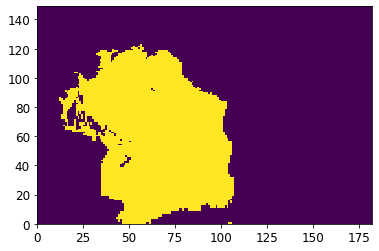

In [17]:
tomglo
plt.pcolormesh(tomglo['tmaskpac'])

In [13]:
t = xr.open_dataset('/gpfs/home/mep22dku/cdftools/mesh_mask_eORCA1_wrk.nc')

In [14]:
t

<xarray.Dataset>
Dimensions:       (x: 362, y: 332, z: 75)
Dimensions without coordinates: x, y, z
Data variables:
    e1f           (y, x) float64 ...
    e1t           (y, x) float64 ...
    e1u           (y, x) float64 ...
    e1v           (y, x) float64 ...
    e2f           (y, x) float64 ...
    e2t           (y, x) float64 ...
    e2u           (y, x) float64 ...
    e2v           (y, x) float64 ...
    ff            (y, x) float64 ...
    fmask         (z, y, x) int8 ...
    fmaskutil     (y, x) int8 ...
    gdepu         (z, y, x) float32 ...
    gdepv         (z, y, x) float32 ...
    glamf         (y, x) float32 ...
    glamt         (y, x) float32 ...
    glamu         (y, x) float32 ...
    glamv         (y, x) float32 ...
    gphif         (y, x) float32 ...
    gphit         (y, x) float32 ...
    gphiu         (y, x) float32 ...
    gphiv         (y, x) float32 ...
    isfdraft      (y, x) float32 ...
    mbathy        (y, x) int16 ...
    misf          (y, x) int16 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    nav_lon       (y, x) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    tmaskutil     (y, x) int8 ...
    umask         (z, y, x) int8 ...
    umaskutil     (y, x) int8 ...
    vmask         (z, y, x) int8 ...
    vmaskutil     (y, x) int8 ...
    e3t           (z, y, x) float64 ...
    e3u           (z, y, x) float64 ...
    e3v           (z, y, x) float64 ...
    e3w           (z, y, x) float64 ...
    e3t_0         (z) float64 ...
    e3w_0         (z) float64 ...
    gdept,        (z, y, x) float32 ...
    gdepw         (z, y, x) float32 ...
    gdept_0       (z) float64 ...
    gdepw_0       (z) float64 ...
Attributes:
    file_name:                 mesh_mask.nc
    TimeStamp:                 13/01/2016 14:10:41 +0000
    NCO:                       4.3.2
    nco_openmp_thread_number:  1
    history:                   Wed Jan 13 16:57:27 2016: /project/ukmo/rhel6/...